In [ ]:
import dataset
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

m = 100
xs, ys = dataset.get_beans(m)
plt.title("Size-Toxicity Function", fontsize=12)
plt.xlabel("Size")
plt.ylabel("Toxicity")

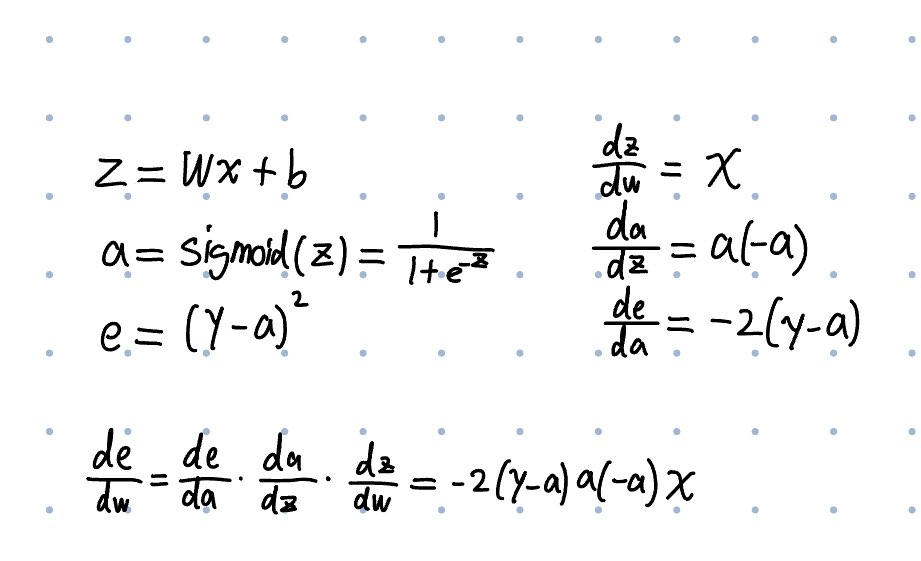

In [ ]:
# Stochastic Gradient Descent
# AKA batch size of 1

# Initial Values
w = 0.1
b = 0.1
# Example calculation
z = w * xs + b
a = 1/(1 + np.exp(-z))

plt.scatter(xs, ys)
plt.plot(xs, a)
plt.show()

for _ in range(5000):
    for i in range(m):
        x = xs[i]
        y = ys[i]
        
        # Find partial derivative of w and b
        z = w * x + b
        a = 1/(1 + np.exp(-z))
        e = (y - a)**2
        
        de_da = -2 * (y - a)
        da_dz = a * (1 - a)
        dz_dw = x
        dz_db = 1
        
        # Chain Rule
        de_dw = de_da * da_dz * dz_dw
        de_db = de_da * da_dz * dz_db
        
        # Update w and b
        alpha = 0.05
        w = w - alpha * de_dw
        b = b - alpha * de_db
    
    if _%100 == 0:
        try:
            plt.clf()
            plt.scatter(xs, ys)
            plt.xlim(0, 1)
            plt.ylim(0, 1.2)
            z = w * xs + b
            a = 1/(1 + np.exp(-z))
            plt.plot(xs, a)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            plt.pause(0.01)
        except KeyboardInterrupt:
            break

plt.show()